The gaol of this notebook is to show that there is an interesting sharing behavior of the energy eigenstates.



In [1]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

from q_solve import generate_result
from q_solve import generate_result_envi_superpo
from q_solve import generate_result_more
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from VN import plot_VN
from VN import compute_VN_time
from e_spectrum import plot_e_spectrum
from Neff import plot_Neff_schmidt_Neff_tot
from checkup import checkup
from make_gif import make_gif_distribs1s2_new
from make_gif import make_gif_distribs1s2_new_zoomed
from make_gif import make_gif_distrib_pointer
from make_gif import make_gif_distrib_pointer_s1
from make_gif import make_gif_distrib_pointer_s2
from make_gif import make_gif_distrib_interf

from overlap import plot_p_overlap_graph
from overlap import plot_p_overlap_graph_characterize
from similarities import probs_schmidt_in_energy_eigenstates
from similarities import metric_similarity_btw_s1_s2_plot


from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from PIL import Image
#from overlap import compute_schmidt_full


Arguments for there being interesting dynamics in the sharing in the total energy eigenspace

1) Look at it directly. Schmidt 1 and 2 seem to be going from sharing space to not sharing space.
2) We can quantify this by looking at the overlape, where we them to the overlap of 2 randomly initialized states.

In [2]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.052
# Define the time settings for the simulation
tmax= 20
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)

In [62]:
d1, d2 = 10, 200
w = 0.41# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.05
tmax= 100
ind_nb = 100
q2=4
q1=2*(np.sqrt(w)/np.sqrt(1-w)-1)+q2*np.sqrt(w)/np.sqrt(1-w)
print(q1)
k0=round(q1)
k1=q2

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result_more(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1,k0,k1)

3.001694628077805


In [3]:

eigenenergies_total, eigenstates_total = H_total.eigenstates() 

In [4]:
make_gif_distribs1s2_new(Int_strength,w,result,eigenstates_total,eigenenergies_total,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distribs1s2_new_zoomed(Int_strength,w,result,eigenstates_total,eigenenergies_total,[0],d1,d2,E_spacing,tmax,ind_nb)

# Replace 'path_to_your_gif.gif' with the path to your GIF file
gif_path = f'Gifs/distrib_schmidt1_2_over_energy_spectrum_EI_{Int_strength}_w_{w}_env_NA_d1_{d1}_d2_{d2}_Espace_{E_spacing}_tmax_{tmax}_ind_nb_{ind_nb}.gif'

gif_path_zoomed =f'Gifs/zoomed_distrib_schmidt1_2_over_energy_spectrum_EI_{Int_strength}_w_{w}_env_NA_d1_{d1}_d2_{d2}_Espace_{E_spacing}_tmax_{tmax}_ind_nb_{ind_nb}.gif'

# Create HTML code to display the GIF
html_code = f'<img src="{gif_path}">'
# Display the GIF
display(HTML(html_code))
# Create HTML code to display the GIF
html_code_z = f'<img src="{gif_path_zoomed}">'
# Display the GIF
display(HTML(html_code_z))


[0]


wi_0.2_EI_0.03
generated
wi_0.2_EI_0.06
generated
wi_0.2_EI_0.09
generated
wi_0.3_EI_0.03
generated
wi_0.3_EI_0.06
generated
wi_0.3_EI_0.09
generated
wi_0.4_EI_0.03
generated
wi_0.4_EI_0.06
generated
wi_0.4_EI_0.09
generated


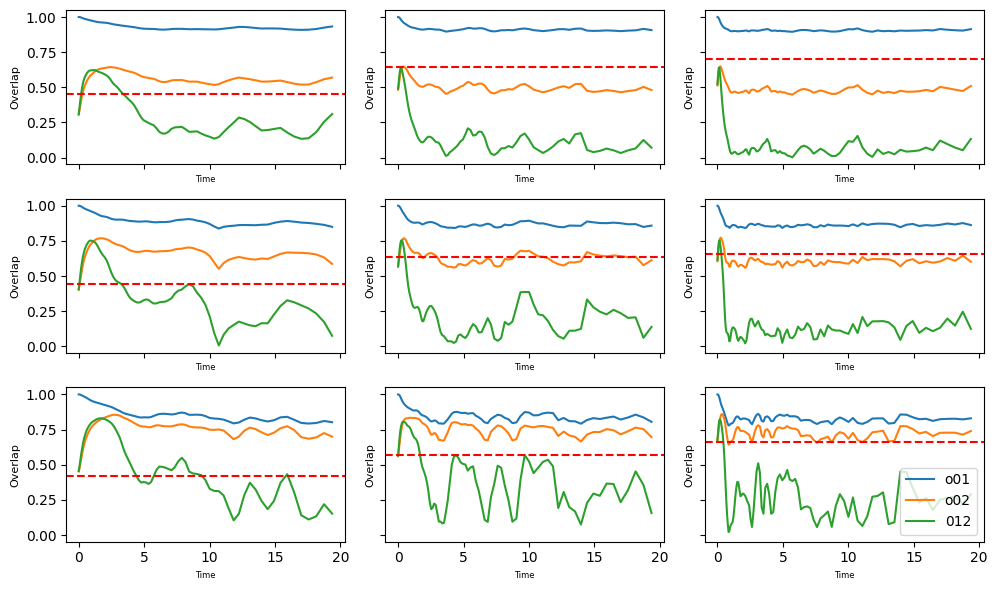

In [2]:
plot_p_overlap_graph_characterize(10,200,[0.2,0.3,0.4],1.0, [0.03,0.06,0.09],20, 100,[0]) #[0.2,0.2,0.3,0.4] [0.03,0.05,0.07,0.09]

The overlap of Schmidt 1 and 2 goes to lower than 2 randomly initialized states (to look like the global state). This is confirmation that they are not overlaping in a random way